In [6]:
#import dataset
import pandas as pd
data = pd.read_csv(r"C:\Users\HP\Downloads\Delhi Preprocessed.csv")
data

,StationId,Datetime,PM2.5,PM10,NO2,CO,SO2,O3,AQI,StationName,Day_period,Month,Year,Season,AQ_Acceptability,AQI_Bucket
0,DL007,01-01-2015 16:00,218.02,340.66,48.42,0.95,16.405951,110.16,551.0,"CRRI Mathura Road, Delhi - IMD",2. Afternoon,01. Jan,2015,1. Winter,Unacceptable,Sever
1,DL007,01-01-2015 17:00,164.74,257.40,49.50,0.95,15.030036,109.76,538.0,"CRRI Mathura Road, Delhi - IMD",2. Afternoon,01. Jan,2015,1. Winter,Unacceptable,Sever
2,DL007,01-01-2015 18:00,224.88,351.01,49.15,0.89,17.143136,123.91,530.0,"CRRI Mathura Road, Delhi - IMD",3. Evening,01. Jan,2015,1. Winter,Unacceptable,Sever
3,DL007,01-01-2015 19:00,384.61,600.95,47.78,0.68,22.212031,159.48,585.0,"CRRI Mathura Road, Delhi - IMD",3. Evening,01. Jan,2015,1. Winter,Unacceptable,Sever
4,DL007,01-01-2015 20:00,457.36,714.63,45.81,0.69,24.474789,173.27,595.0,"CRRI Mathura Road, Delhi - IMD",4. Night,01. Jan,2015,1. Winter,Unacceptable,Sever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760657,DL016,01-07-2020 0:00,42.00,139.00,20.92,0.50,9.720000,7.35,94.0,"Jawaharlal Nehru Stadium, Delhi - DPCC",4. Night,07. Jul,2020,3. Monsoon,Acceptable,Satisfactory
760658,DL020,01-07-2020 0:00,47.00,137.25,22.05,0.65,17.270000,12.62,105.0,"Mundka, Delhi - DPCC",4. Night,07. Jul,2020,3. Monsoon,Unacceptable,Moderate
760659,DL017,01-07-2020 0:00,61.13,117.46,21.54,0.86,11.359897,20.41,100.0,"Lodhi Road, Delhi - IMD",4. Night,07. Jul,2020,3. Monsoon,Acceptable,Satisfactory
760660,DL023,01-07-2020 0:00,72.50,189.50,35.77,0.38,3.670000,14.57,115.0,"Narela, Delhi - DPCC",4. Night,07. Jul,2020,3. Monsoon,Unacceptable,Moderate


In [7]:
data['AQI_Bucket'].unique()

array(['Sever', 'Very Poor', 'Poor', 'Moderate', 'Satisfactory', 'Good'],
      dtype=object)

In [8]:
x_values = data[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760662 entries, 0 to 760661
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PM2.5   760662 non-null  float64
 1   PM10    760662 non-null  float64
 2   NO2     760662 non-null  float64
 3   CO      760662 non-null  float64
 4   SO2     760662 non-null  float64
 5   O3      760662 non-null  float64
dtypes: float64(6)
memory usage: 34.8 MB


<AxesSubplot:>

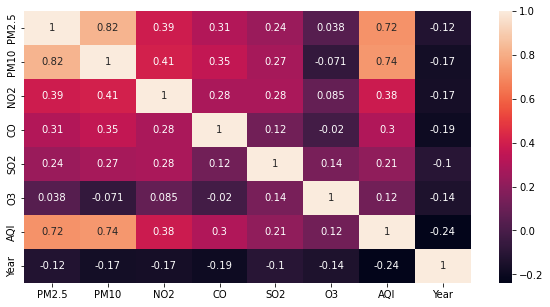

In [9]:
#crete heat map to check the correlation between coloumns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

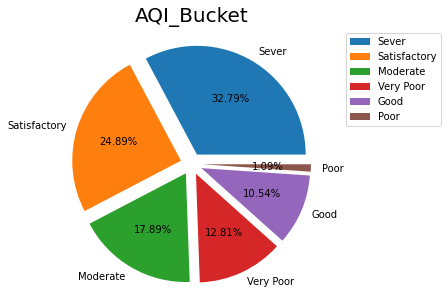

In [10]:
#create pie plot
labels = ['Sever', 'Satisfactory', 'Moderate', 'Very Poor', 'Good', 'Poor']
size = data['AQI_Bucket'].value_counts()
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.figure(figsize=(10,5))
plt.pie(size,explode = explode, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('AQI_Bucket', fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [11]:
y = [min(data['AQI']),max(data['AQI'])]
x = [data['AQ_Acceptability'].iloc[data['AQI'].argmin()],data['AQ_Acceptability'].iloc[data['AQI'].argmax()]]
r_unacc = f"{min(data[data['AQ_Acceptability']=='Unacceptable']['AQI'])}-{max(data[data['AQ_Acceptability']=='Unacceptable']['AQI'])}"
r_accep = f"{min(data[data['AQ_Acceptability']=='Acceptable']['AQI'])}-{max(data[data['AQ_Acceptability']=='Acceptable']['AQI'])}"
tab = pd.DataFrame({"Unacceptable":r_unacc,"Acceptable":r_accep},index=['range']).T
tab

,range
Unacceptable,101.0-1093.0
Acceptable,16.0-100.9028097


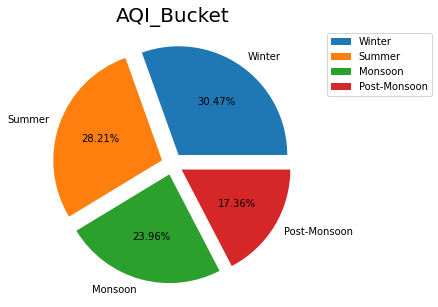

In [12]:
#create pie plot
labels = ['Winter', 'Summer', 'Monsoon', 'Post-Monsoon']
size = data['Season'].value_counts()
explode = [0.1, 0.1, 0.1, 0.1]
plt.figure(figsize=(10,5))
plt.pie(size,explode = explode, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('AQI_Bucket', fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

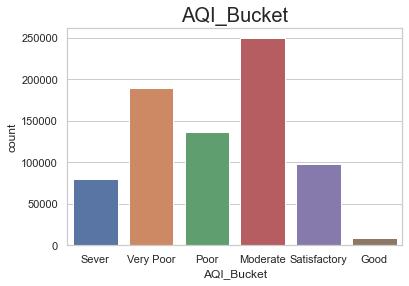

In [13]:
#create bar plot
sns.set_theme(style="whitegrid")
sns.countplot(x=data["AQI_Bucket"])
plt.title('AQI_Bucket', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Min and Max AQI stations')

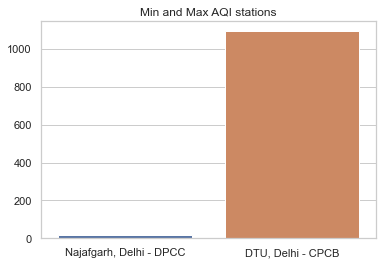

In [14]:
y = [min(data['AQI']),max(data['AQI'])]
x = [data['StationName'].iloc[data['AQI'].argmin()],data['StationName'].iloc[data['AQI'].argmax()]]
sns.barplot(x=x,y=y).set_title('Min and Max AQI stations')

Text(0.5, 1.0, 'Correlation of gases with AQI')

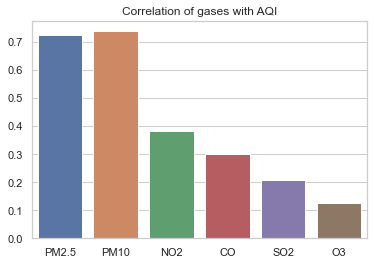

In [15]:
cr = pd.DataFrame(data.corr()['AQI'])
cr.drop(['AQI','Year'],inplace=True)
sns.barplot(x = list(data.columns[2:8]),y=cr.iloc[:,0].values).set_title('Correlation of gases with AQI')